In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv('co_blr_aq_lockdown_effect_CSB.csv')
df1.head()

,Unnamed: 0,location,city,country,utc,local,parameter,value,unit,latitude,longitude,attribution
0,0,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T22:15:00Z,2020-06-20T03:45:00+05:30,co,170,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
1,1,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T21:00:00Z,2020-06-20T02:30:00+05:30,co,150,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
2,2,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T19:30:00Z,2020-06-20T01:00:00+05:30,co,100,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
3,3,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T17:30:00Z,2020-06-19T23:00:00+05:30,co,540,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
4,4,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T16:45:00Z,2020-06-19T22:15:00+05:30,co,530,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."


In [3]:
df1.columns

Index(['Unnamed: 0', 'location', 'city', 'country', 'utc', 'local',
       'parameter', 'value', 'unit', 'latitude', 'longitude', 'attribution'],
      dtype='object')

In [4]:
df1.attribution.nunique()

1

In [5]:
df2 = pd.read_csv('no2_blr_aq_lockdown_effect_CSB.csv')
df2.columns

Index(['Unnamed: 0', 'location', 'city', 'country', 'utc', 'weekday', 'local',
       'parameter', 'value', 'unit', 'latitude', 'longitude', 'attribution'],
      dtype='object')

In [6]:
df3 = pd.read_csv('o3_blr_aq_lockdown_effect_CSB.csv')
df4 = pd.read_csv('pm10_blr_aq_lockdown_effect_CSB.csv')
df5 = pd.read_csv('pm25_blr_aq_lockdown_effect_CSB.csv')
df6 = pd.read_csv('so2_blr_aq_lockdown_effect_CSB.csv')

In [7]:
df_list=[df1,df2,df3,df4,df5,df6]
df = pd.concat(df_list)

In [8]:
df.head()


,Unnamed: 0,location,city,country,utc,local,parameter,value,unit,latitude,longitude,attribution,weekday
0,0,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T22:15:00Z,2020-06-20T03:45:00+05:30,co,170.0,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d...",NaN
1,1,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T21:00:00Z,2020-06-20T02:30:00+05:30,co,150.0,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d...",NaN
2,2,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T19:30:00Z,2020-06-20T01:00:00+05:30,co,100.0,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d...",NaN
3,3,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T17:30:00Z,2020-06-19T23:00:00+05:30,co,540.0,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d...",NaN
4,4,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T16:45:00Z,2020-06-19T22:15:00+05:30,co,530.0,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d...",NaN


In [9]:
print(df.columns)
print(df.shape)

Index(['Unnamed: 0', 'location', 'city', 'country', 'utc', 'local',
       'parameter', 'value', 'unit', 'latitude', 'longitude', 'attribution',
       'weekday'],
      dtype='object')
(20652, 13)


In [10]:
df.nunique(dropna=False)

Unnamed: 0     3779
location          1
city              1
country           1
utc            3829
local          3829
parameter         6
value          2311
unit              1
latitude          2
longitude         1
attribution       1
weekday           8
dtype: int64

In [11]:
df.nunique(dropna=True)

Unnamed: 0     3779
location          1
city              1
country           1
utc            3829
local          3829
parameter         6
value          2311
unit              1
latitude          2
longitude         1
attribution       1
weekday           7
dtype: int64

In [12]:
df.weekday.unique()

array([nan,  7.,  6.,  5.,  4.,  2.,  1.,  3.])

In [13]:
df.dropna(subset=['weekday'])

,Unnamed: 0,location,city,country,utc,local,parameter,value,unit,latitude,longitude,attribution,weekday
0,0,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T22:15:00Z,2020-06-20T03:45:00+05:30,no2,12.60,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d...",7.0
1,1,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T21:00:00Z,2020-06-20T02:30:00+05:30,no2,13.00,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d...",7.0
2,2,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T19:30:00Z,2020-06-20T01:00:00+05:30,no2,13.50,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d...",7.0
3,3,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T17:30:00Z,2020-06-19T23:00:00+05:30,no2,16.20,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d...",6.0
4,4,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T16:45:00Z,2020-06-19T22:15:00+05:30,no2,15.10,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d...",6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3676,3676,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-02-20T01:45:00Z,2020-02-20T07:15:00+05:30,o3,27.54,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d...",5.0
3677,3677,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-02-20T01:15:00Z,2020-02-20T06:45:00+05:30,o3,26.03,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d...",5.0
3678,3678,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-02-20T01:00:00Z,2020-02-20T06:30:00+05:30,o3,29.87,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d...",5.0
3679,3679,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-02-20T00:30:00Z,2020-02-20T06:00:00+05:30,o3,25.42,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d...",5.0


In [14]:
df = df.fillna(value={'weekday':0})
df.weekday.unique()

array([0., 7., 6., 5., 4., 2., 1., 3.])

In [15]:
#df = df.drop(columns=['location','city'])

In [16]:
df.head()

,Unnamed: 0,location,city,country,utc,local,parameter,value,unit,latitude,longitude,attribution,weekday
0,0,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T22:15:00Z,2020-06-20T03:45:00+05:30,co,170.0,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d...",0.0
1,1,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T21:00:00Z,2020-06-20T02:30:00+05:30,co,150.0,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d...",0.0
2,2,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T19:30:00Z,2020-06-20T01:00:00+05:30,co,100.0,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d...",0.0
3,3,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T17:30:00Z,2020-06-19T23:00:00+05:30,co,540.0,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d...",0.0
4,4,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T16:45:00Z,2020-06-19T22:15:00+05:30,co,530.0,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d...",0.0


In [17]:
df.drop(['Unnamed: 0','location','city','country','unit','attribution'],axis=1,inplace=True)

In [18]:
df

,utc,local,parameter,value,latitude,longitude,weekday
0,2020-06-19T22:15:00Z,2020-06-20T03:45:00+05:30,co,170.0,12.917348,77.622813,0.0
1,2020-06-19T21:00:00Z,2020-06-20T02:30:00+05:30,co,150.0,12.917348,77.622813,0.0
2,2020-06-19T19:30:00Z,2020-06-20T01:00:00+05:30,co,100.0,12.917348,77.622813,0.0
3,2020-06-19T17:30:00Z,2020-06-19T23:00:00+05:30,co,540.0,12.917348,77.622813,0.0
4,2020-06-19T16:45:00Z,2020-06-19T22:15:00+05:30,co,530.0,12.917348,77.622813,0.0
...,...,...,...,...,...,...,...
2766,2020-02-20T02:30:00Z,2020-02-20T08:00:00+05:30,so2,2.8,12.917348,77.622813,0.0
2767,2020-02-20T02:00:00Z,2020-02-20T07:30:00+05:30,so2,2.7,12.917348,77.622813,0.0
2768,2020-02-20T01:45:00Z,2020-02-20T07:15:00+05:30,so2,2.7,12.917348,77.622813,0.0
2769,2020-02-20T01:00:00Z,2020-02-20T06:30:00+05:30,so2,2.6,12.917348,77.622813,0.0


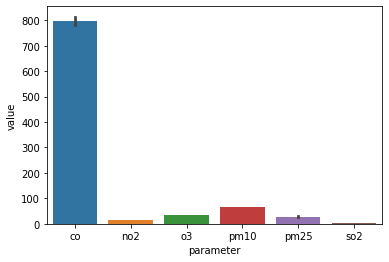

In [21]:
sns.barplot(data=df,x='parameter',y='value')

In [ ]:
#sns.barplot(data=df,x='value',y='longitude',hue='parameter')

In [35]:
#plt.plot(df.latitude,df.value)

In [24]:
labels = list(df.parameter.unique())
labels

['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']

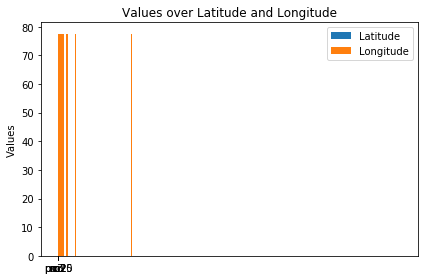

In [30]:
labels = list(df.parameter.unique())
latitude = list(df.latitude)
longitude = list(df.longitude)
value= list(df.value)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.bar(value, latitude, width, label='Latitude')
ax.bar(value, longitude, width, label='Longitude')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Values')
ax.set_title('Values over Latitude and Longitude')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.autoscale(enable=True) 



fig.tight_layout()

plt.show()

In [ ]:
plt.figure(figsize=(15,16))
sns.catplot(data=df,x=value,y=latitude)